<a href="https://colab.research.google.com/github/dpcks/playdata/blob/main/data_processing/%EA%B5%AC%EB%A7%A4%EA%B8%B0%EB%A1%9D_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B0%84%EB%8B%A8%ED%9E%88_%EC%82%B4%ED%8E%B4%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# colab 한글깨짐 방지
- 실행 후 런타임 - 런타임 다시 시작 할 것

In [ ]:
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=fontpath).get_name() 
fm._rebuild()  


%config InlineBackend.figure_format = 'retina'

plt.rc('font', family=font_name)  
plt.rcParams['axes.unicode_minus'] = False 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 다음의 데이터 경로는 본인 경로에 맞게 수정하시오.

In [ ]:
DATA_PATH = "/content/drive/MyDrive/03-data-processing/data/"

In [ ]:
df = pd.read_csv(f"{DATA_PATH}trans_train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167465 entries, 0 to 167464
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   고객번호    167465 non-null  int64 
 1   구매일자    167465 non-null  object
 2   지점      167465 non-null  object
 3   상품번호    167465 non-null  int64 
 4   중분류     167465 non-null  object
 5   대분류     167465 non-null  object
 6   구매가격    167465 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.9+ MB


In [ ]:
df.head()

,고객번호,구매일자,지점,상품번호,중분류,대분류,구매가격
0,10004,2007-06-26 00:00:00,강남점,234160,영 트렌디,캐주얼,2720000
1,10004,2007-07-08 00:00:00,본 점,165162,4대 B/D,피혁잡화,8550000
2,10004,2007-07-14 00:00:00,본 점,663110,국산냉장고.세탁기,대형가전,28800000
3,10004,2007-07-28 00:00:00,본 점,73119,상품군미지정,기타,81500
4,10004,2007-07-28 00:00:00,본 점,73119,주류,주류,2037500


- datetime 형식으로 변환

In [ ]:
df["구매일자"] = pd.to_datetime(df["구매일자"])

# 지점별 구매가격 평균

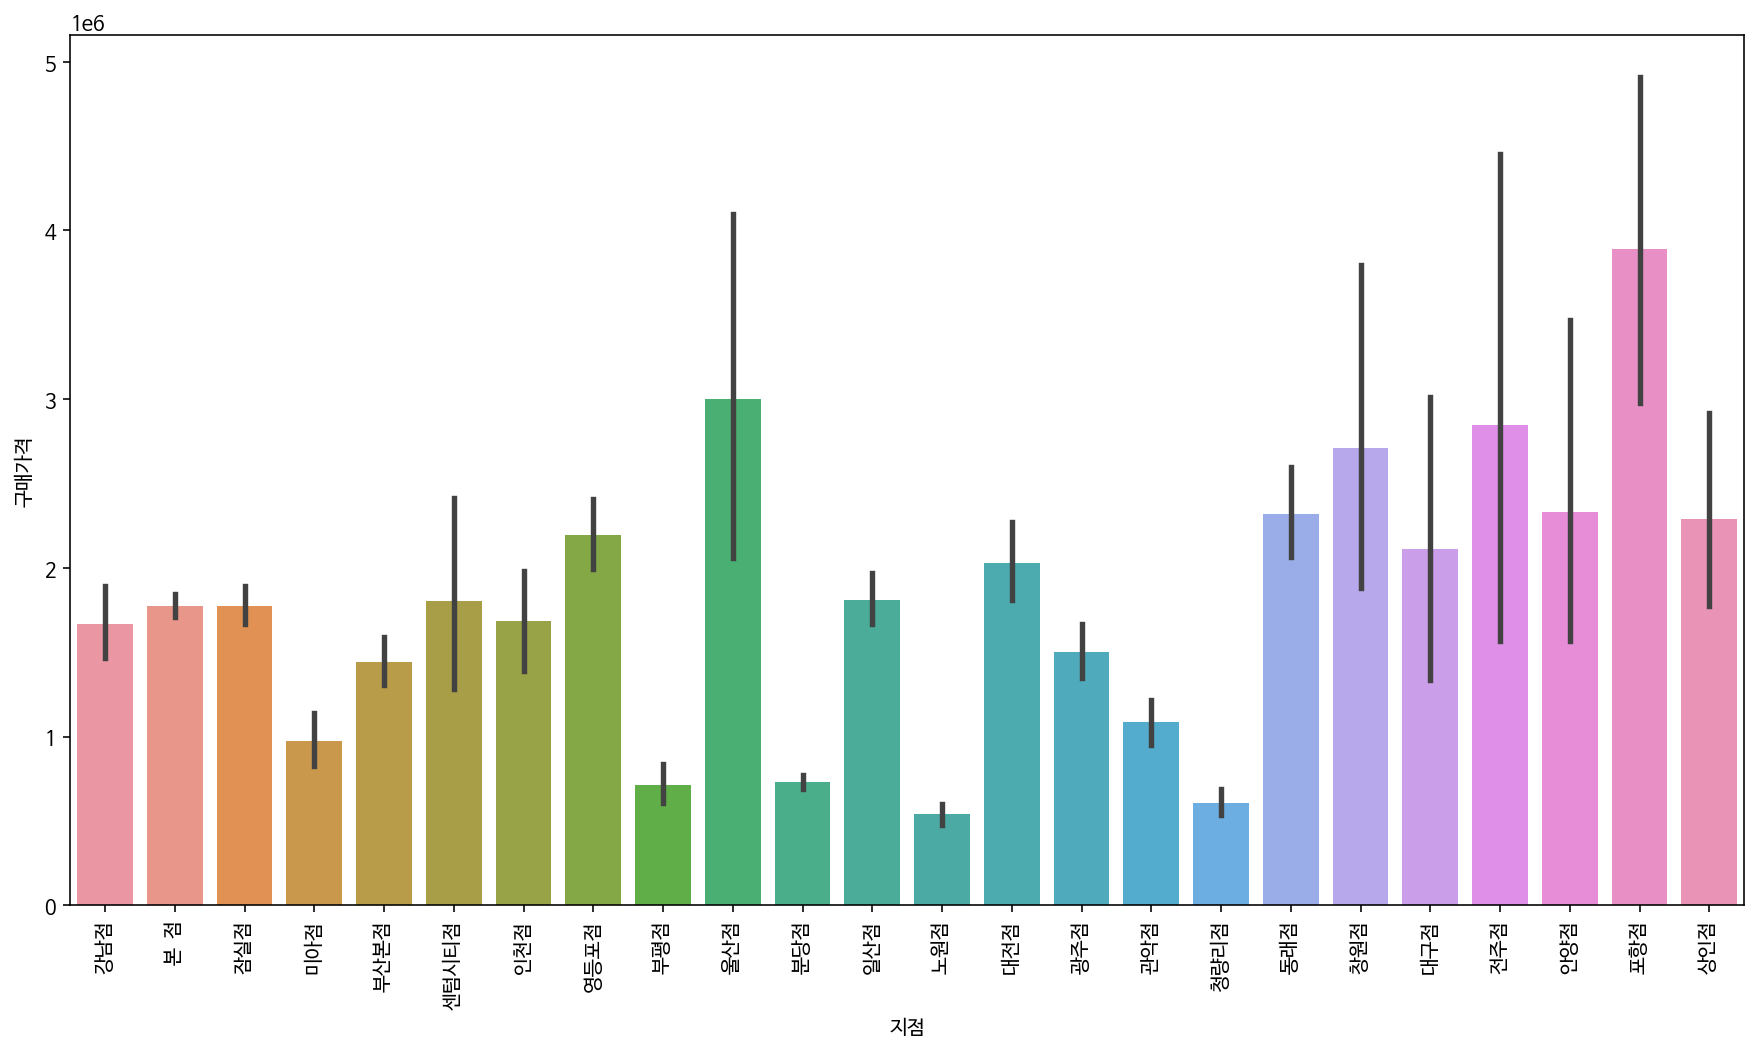

In [ ]:
plt.figure(figsize = (15,8))
sns.barplot(x="지점",y="구매가격", data=df).tick_params(axis = 'x', labelrotation = 90)
plt.show()

# 대분류별 구매가격의 평균

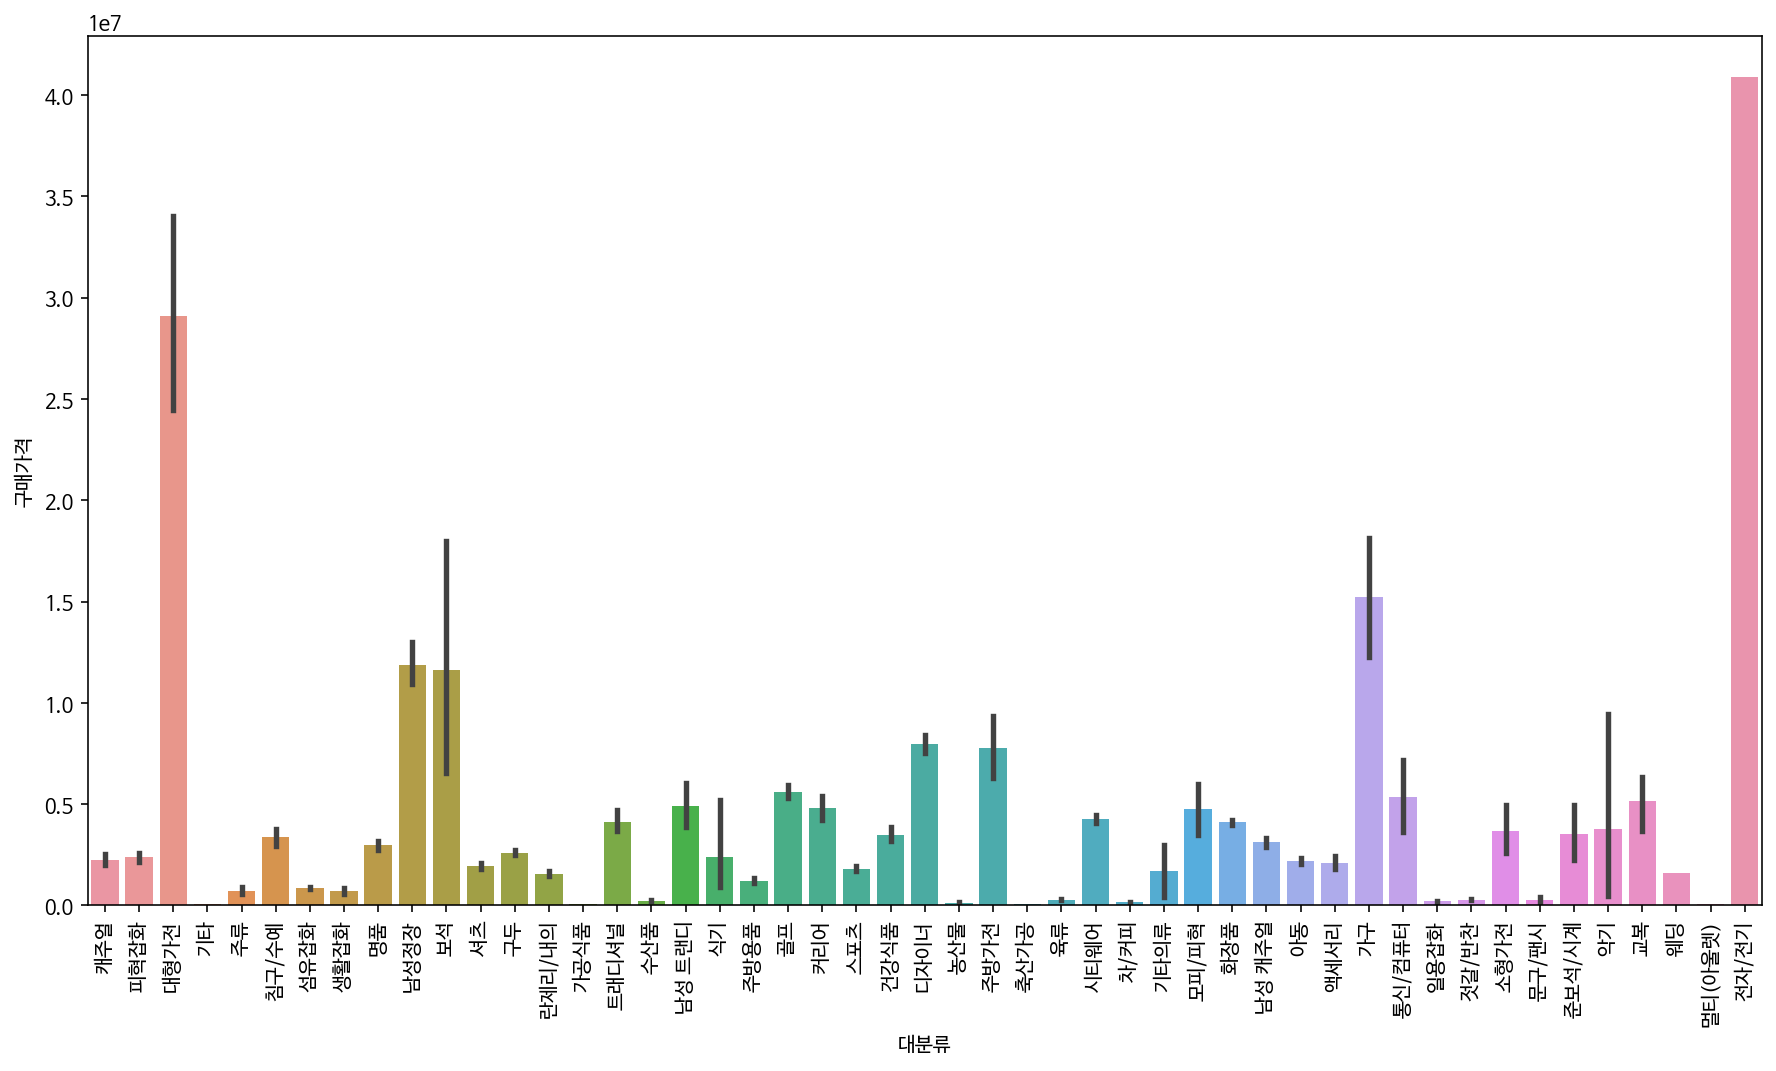

In [ ]:
plt.figure(figsize = (15,8))
sns.barplot(x="대분류",y="구매가격", data=df).tick_params(axis = 'x', labelrotation = 90)
plt.show()

# 지점별 구매일자에 따른 매출 추이

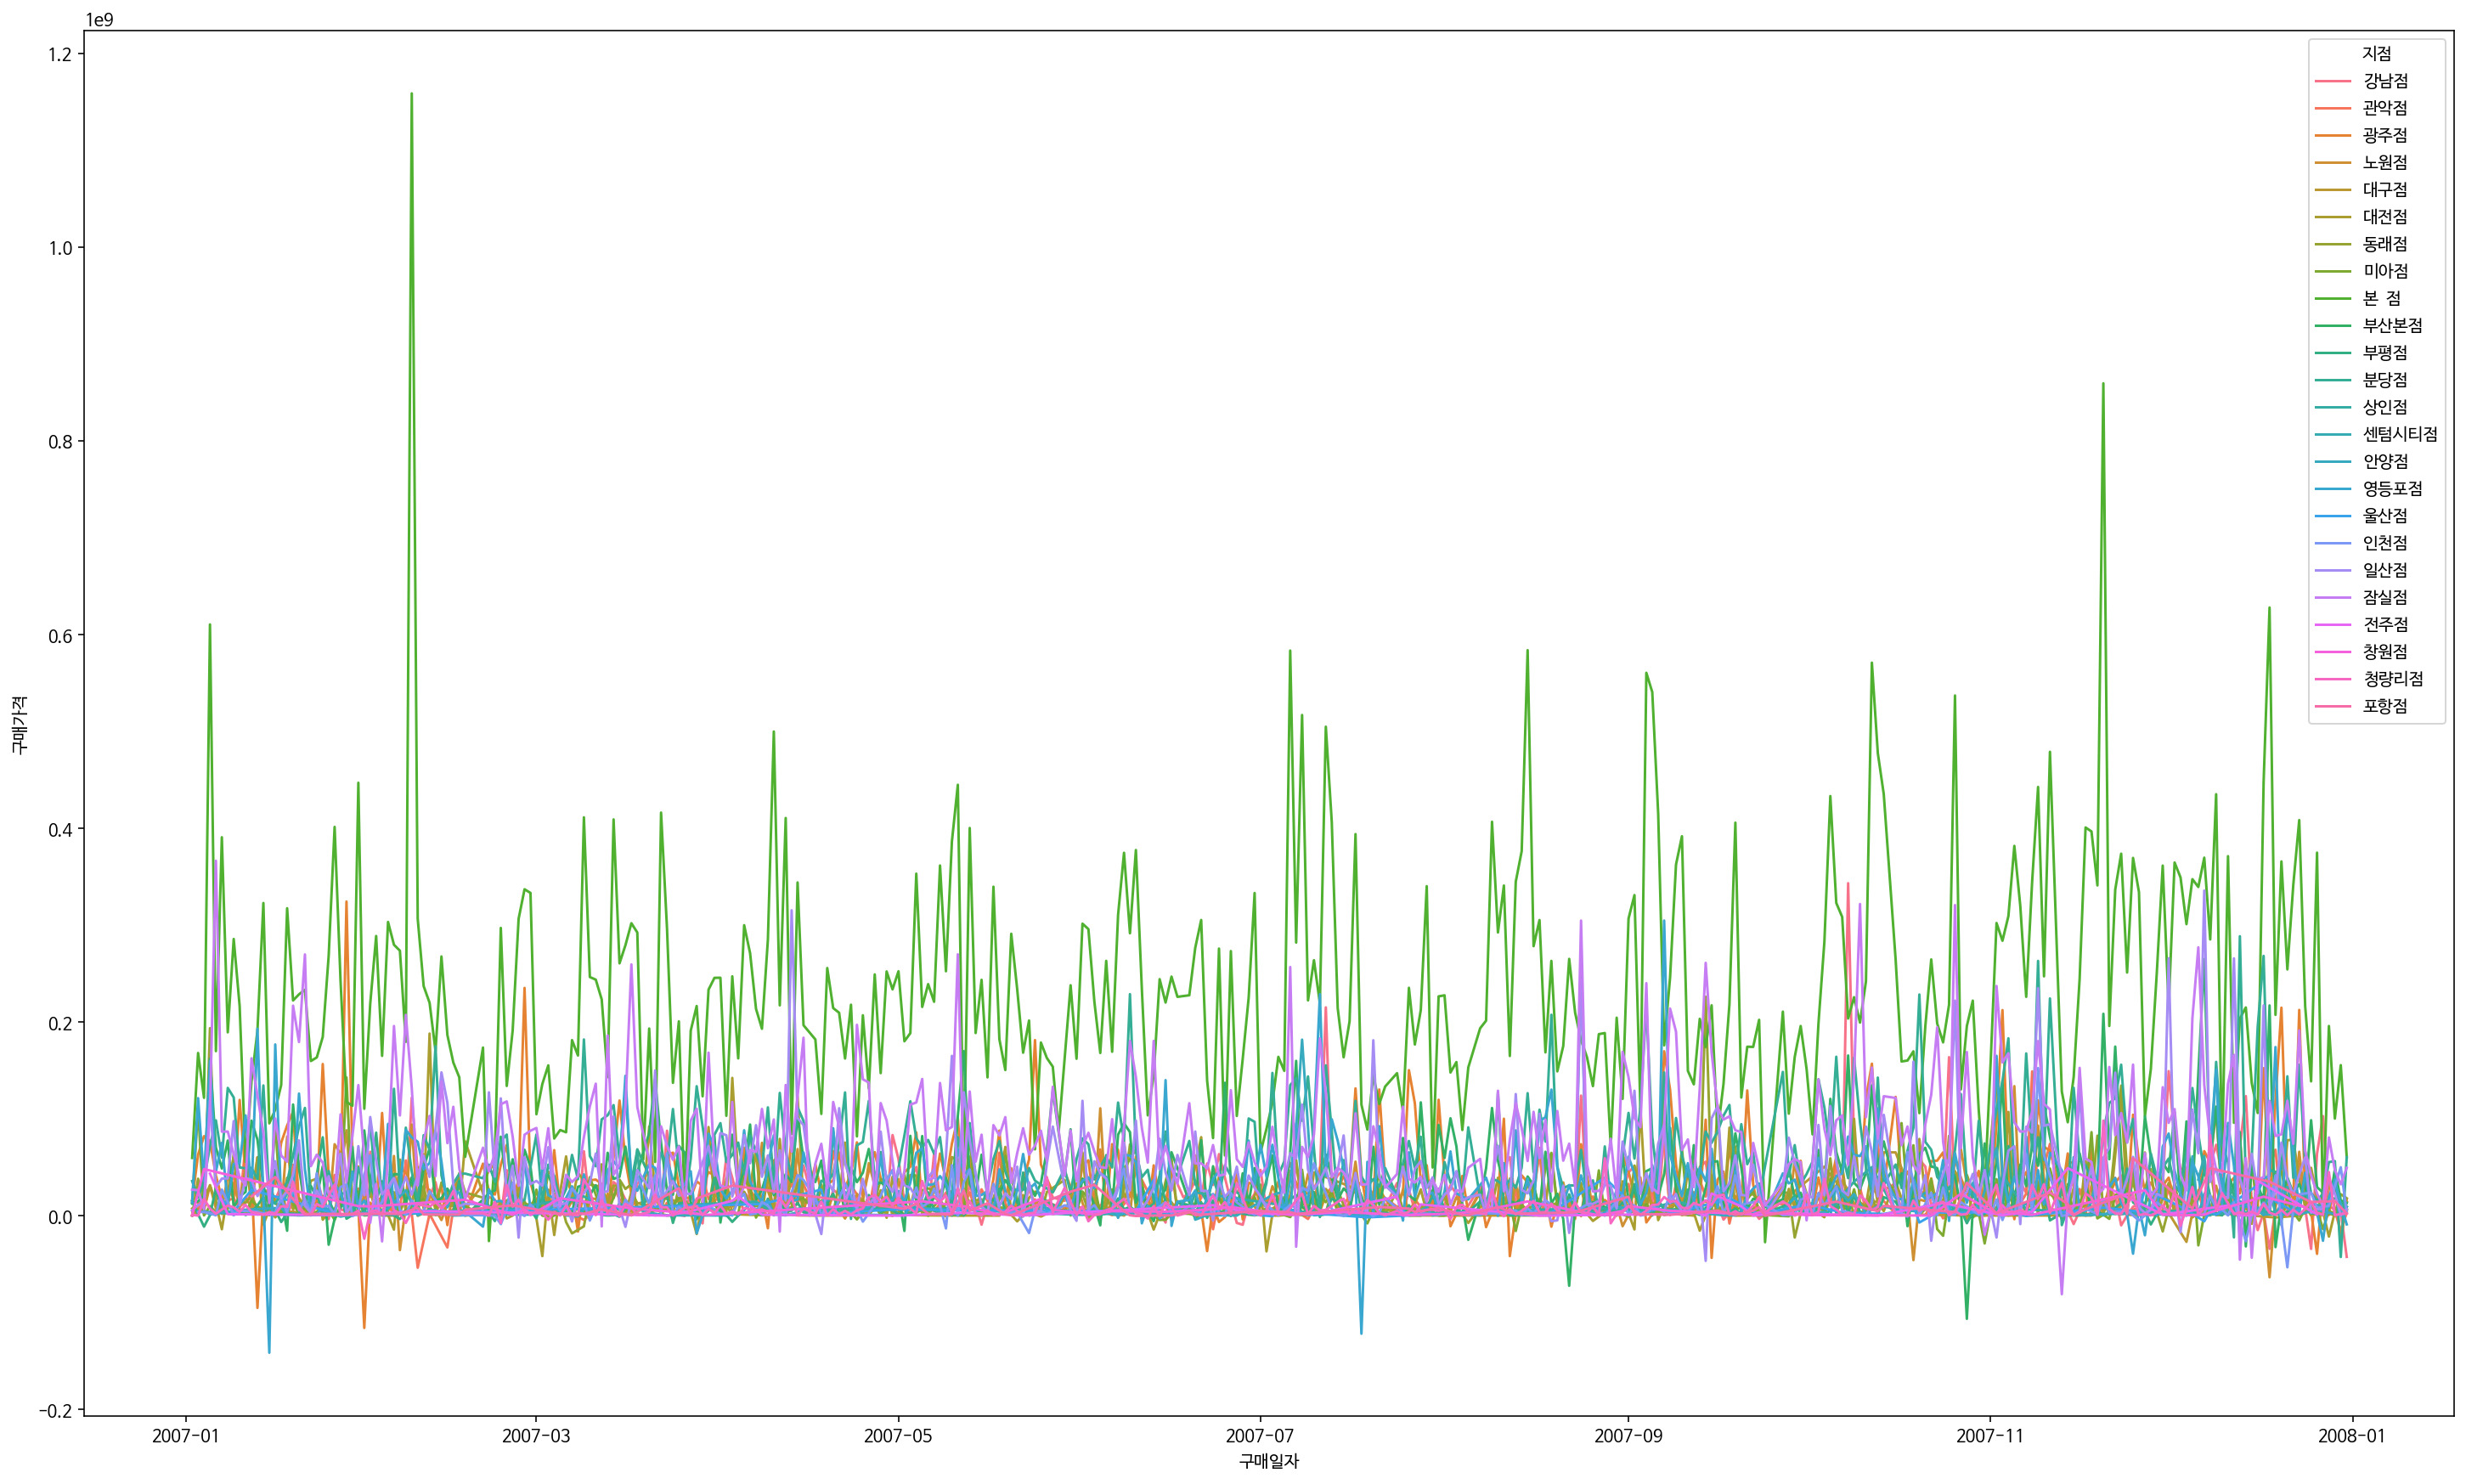

In [ ]:
plt.figure(figsize = (25,15))
tmp = df.groupby(["지점","구매일자"])["구매가격"].agg("sum").reset_index()
sns.lineplot(x = "구매일자"  ,y="구매가격",data=tmp ,hue="지점")
plt.show()

# 각 구매일자에 대한 대분류별 구매건수

In [ ]:
tmp = pd.pivot_table(
    df,
    index = "구매일자",
    columns = "대분류",
    values = "고객번호",
    aggfunc = "count",
    fill_value= 0
)
tmp

대분류,가공식품,가구,건강식품,골프,교복,구두,기타,기타의류,남성 캐주얼,남성 트랜디,...,준보석/시계,차/커피,축산가공,침구/수예,캐주얼,커리어,통신/컴퓨터,트래디셔널,피혁잡화,화장품
구매일자,,,,,,,,,,,,,,,,,,,,,
2007-01-02,58,0,1,4,0,4,52,0,1,0,...,0,5,18,2,8,1,0,0,1,4
2007-01-03,46,1,2,5,0,1,70,0,0,0,...,0,7,22,8,4,1,0,1,0,20
2007-01-04,40,0,1,5,0,1,58,0,3,0,...,0,5,14,1,9,2,0,4,2,15
2007-01-05,105,1,17,11,0,8,177,1,1,2,...,1,15,49,4,15,2,1,11,8,27
2007-01-06,66,0,5,7,0,2,89,0,4,1,...,0,14,15,6,15,1,1,11,8,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007-12-27,62,1,3,5,0,4,78,0,1,0,...,0,21,22,2,3,1,0,1,1,12
2007-12-28,72,1,2,8,0,4,83,0,0,1,...,0,13,29,0,5,2,0,3,1,20
2007-12-29,63,0,1,5,0,3,88,0,1,1,...,1,17,34,2,10,0,0,3,0,17


- 대분류별 구매건수에 대한 히트맵

In [ ]:
plt.figure(figsize = (35,35))
sns.heatmap(tmp.corr(), annot=True, linewidths=1, cmap='Blues') 
plt.show()

# features 생성하기

In [ ]:
features = pd.DataFrame(df["고객번호"].unique(),columns=["고객번호"])
features.head()

,고객번호
0,10004
1,10013
2,10023
3,10040
4,10052


In [ ]:
agg_dict = {
    '구매일자':[
        ("내점일수","nunique"),
        ("구매주기",lambda x : (x.max() - x.min()).days / x.nunique() ), # 최근 구매일과 최초 구매일의 차이를 구하고 내점일수로 나누면 구매주기라고 볼수있음
        ("주말방문비율", lambda x : (x.dt.weekday > 4).mean() ), # 4보다 크면 토,일 이니까!!
        ("주구매요일" , lambda x: x.dt.weekday.mode()[0] ), # 최빈값이 여러개 일수도 있어서..
        ("봄구매비율" , lambda x : (x.dt.month.isin([3,4,5])).mean() ),
        ("여름구매비율" , lambda x : (x.dt.month.isin([6,7,8])).mean() ),
        ("가을구매비율" , lambda x : (x.dt.month.isin([9,10,11])).mean() ),
        ("겨울구매비율" , lambda x : (x.dt.month.isin([12,1,2])).mean() ),
        ("일평균구매건수" , lambda x : x.count() / x.nunique() ), # 구매건수를 구매일자로 나누면 일평균 구매건수라고 볼수있음.
        ("거래개월수" , lambda x : x.dt.month.nunique() )
    ],
    '지점':[
         ("방문지점수","nunique"),
         ("주구매지점" , lambda x : x.mode()[0])
    ],
    '상품번호': [
             ('상품번호수', 'nunique'),
             ],
    '중분류': [
            ('중분류수', 'nunique'),
            ('주구매중분류', lambda x: x.mode()[0]), 
            ],
    '대분류': [ 
            ('대분류수', 'nunique'),
            ('주구매대분류', lambda x: x.mode()[0]),
            ],
    '구매가격' : [
        ('총구매액','sum'),
        ('구매건수', 'count'), 
        ('평균구매액', "mean"),
        ('최대구매액', 'max'),
        ('최소구매액',lambda x: x[x > 0].min() ) ,
        ('환불금액',lambda x: x[x < 0].sum() ) ,
        ('환불건수', lambda x: ( x < 0 ).sum() ), 
        ('구매금액표준편차',lambda x: x[x>0].std() ),
    ],
   
}

tmp = df.groupby('고객번호').agg(agg_dict)
tmp.columns = tmp.columns.droplevel()
tmp = tmp.reset_index()

features = features.merge(tmp,how="left",on = "고객번호") # features 변수에 merge 한 결과를 확인하고 변수에 넣으세요!!
features

,고객번호,내점일수,구매주기,주말방문비율,주구매요일,봄구매비율,여름구매비율,가을구매비율,겨울구매비율,일평균구매건수,...,대분류수,주구매대분류,총구매액,구매건수,평균구매액,최대구매액,최소구매액,환불금액,환불건수,구매금액표준편차
0,10004,26,11.423077,0.617647,5,0.161765,0.397059,0.250000,0.191176,2.615385,...,25,가공식품,390166360,68,5.737741e+06,41760000,6570.0,-4700000,1,9.453819e+06
1,10013,11,21.090909,0.117647,4,0.352941,0.235294,0.352941,0.058824,1.545455,...,9,가공식품,22447800,17,1.320459e+06,13375000,6900.0,0,0,3.179888e+06
2,10023,21,16.666667,0.348837,3,0.348837,0.162791,0.232558,0.255814,2.047619,...,17,골프,81765810,43,1.901530e+06,14325000,1250.0,-6003000,1,3.738478e+06
3,10040,24,13.833333,0.121212,4,0.272727,0.151515,0.318182,0.257576,2.750000,...,15,명품,213705680,66,3.237965e+06,24738000,1500.0,-12948000,3,5.883481e+06
4,10052,28,8.892857,0.333333,2,0.585586,0.243243,0.171171,0.000000,3.964286,...,20,시티웨어,358336570,111,3.228257e+06,38328000,1250.0,-30868000,3,6.959274e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2549,49813,83,4.253012,0.167116,1,0.226415,0.339623,0.237197,0.196765,4.469880,...,20,가공식품,47428060,371,1.278384e+05,9120000,1000.0,-1532000,2,5.931527e+05
2550,49892,31,10.096774,0.363636,6,0.181818,0.289256,0.380165,0.148760,3.903226,...,20,농산물,54369820,121,4.493374e+05,7500000,1100.0,0,0,1.148466e+06
2551,49925,3,18.333333,0.333333,3,0.000000,1.000000,0.000000,0.000000,1.000000,...,1,명품,1657400,3,5.524667e+05,1015000,39000.0,0,0,4.899894e+05
2552,49943,7,30.285714,0.545455,5,0.090909,0.545455,0.272727,0.090909,1.571429,...,7,농산물,40742400,11,3.703855e+06,21780000,36000.0,0,0,6.610017e+06


## 생성한 특성 히트맵 보기

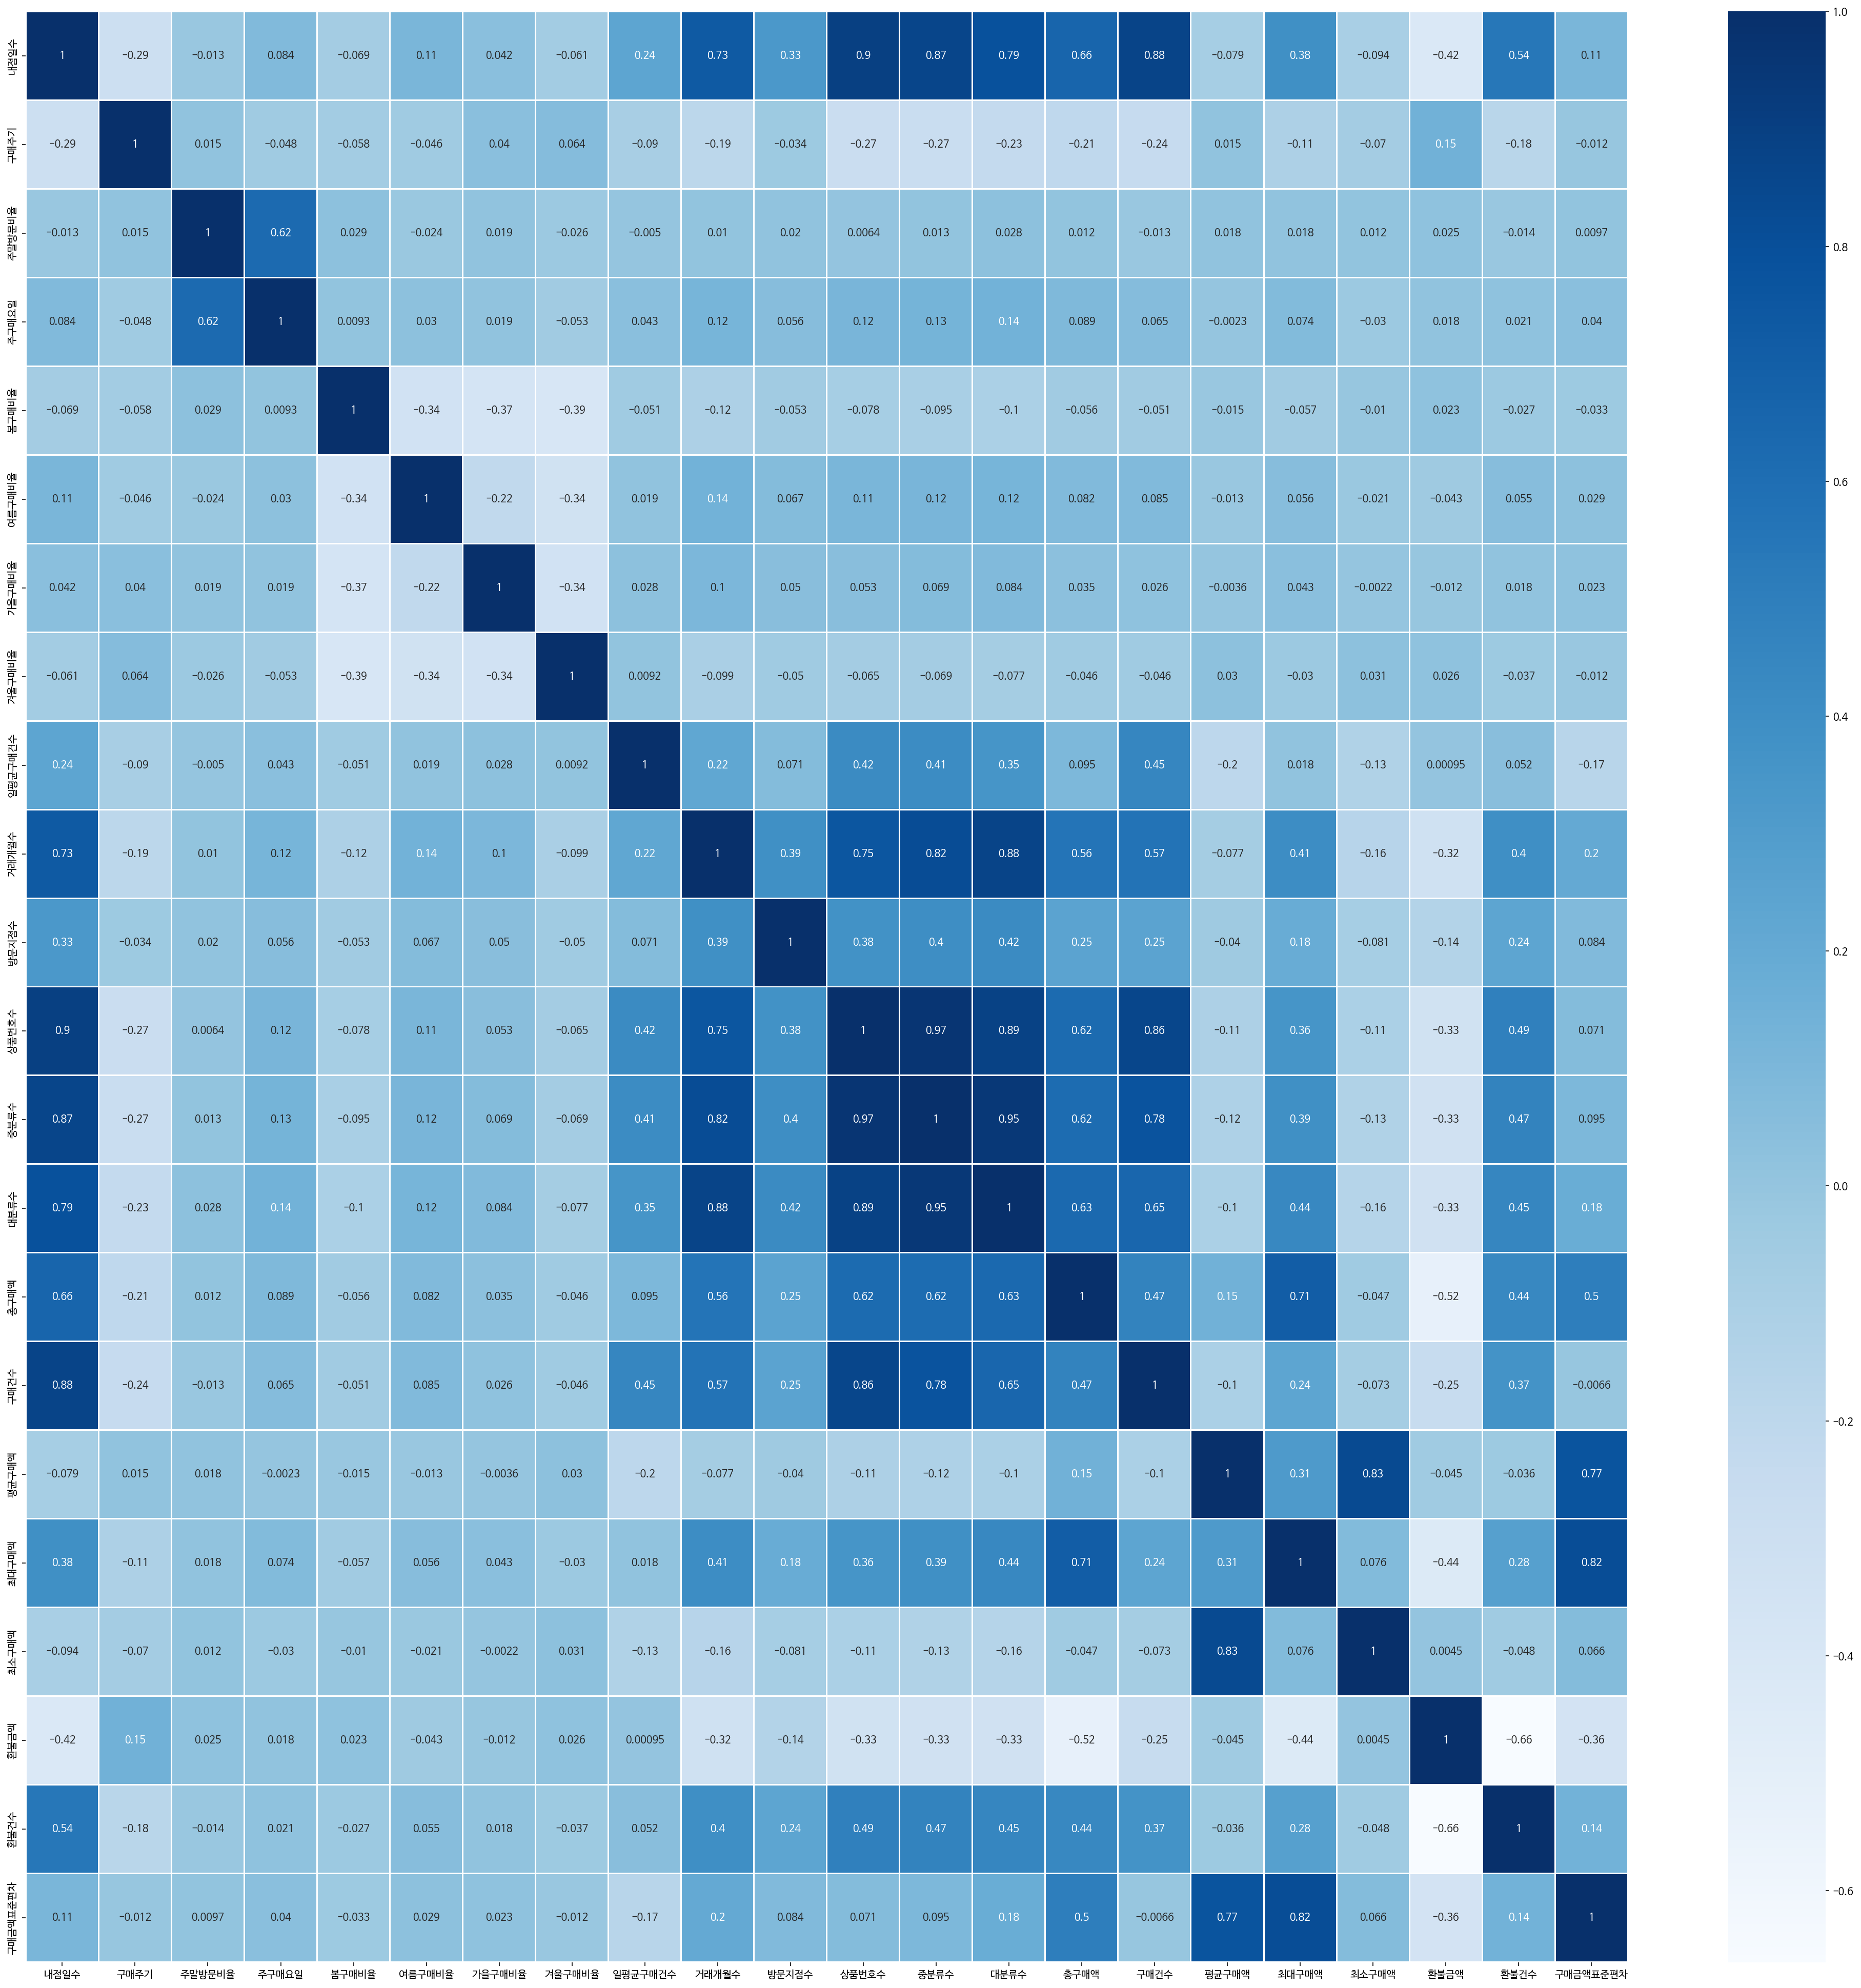

In [ ]:
plt.figure(figsize = (35,35))
sns.heatmap(features.iloc[:,1:].corr(), annot=True, linewidths=1, cmap='Blues') 
plt.show()

# Plotly 특징
- Interactive 한 그래프 생성
- https://plotly.com/python/getting-started/#jupyter-notebook-support

In [ ]:
import plotly.express as px

In [ ]:
px.histogram(features,x="상품번호수",text_auto=True)

In [ ]:
px.scatter(features,x="구매건수",y="환불건수",size="환불건수",color="주구매대분류")

In [ ]:
px.box(features,x="주구매대분류",y="환불건수")

- violinplot
    - 바이올린 플롯 (Violin plot)은 데이터의 분포와 범위를 한눈에 보기 쉽게 나타내는 그래프 형식

    - 박스 플롯 (Box plot)과 비슷하지만 더 실제에 가까운 분포를 알 수 있다는 장점이 있다.

In [ ]:
px.violin(features,x="주구매대분류",y="환불건수", box=True, points="all")

In [ ]:
px.imshow(features.iloc[:,1:].corr(),width=1000,height=1000,text_auto=True)